In [1]:
! python -m venv .venv

In [3]:
! .venv/Scripts/activate

".venv" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [1]:
! pip install opencv-python numpy matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   -- ------------------------------------- 2.6/39.5 MB 16.7 MB/s eta 0:00:03
   -------- ------------------------------- 8.1/39.5 MB 21.8 MB/s eta 0:00:02
   ------------ --------------------------- 12.6/39.5 MB 22.5 MB/s eta 0:00:02
   --------------- ------------------------ 14.9/39.5 MB 19.2 MB/s eta 0:00:02
   ------------------- -------------------- 19.7/39.5 MB 22.2 MB/s eta 0:00:01
   ------------------------- -------------- 24.9/39.5 MB 22.2 MB/s eta 0:00:01
   ------------------------------- -------- 30.7/39.5 MB 22.1 MB/s eta 0:00:01
   ----------------------------------- ---- 35.1/39.5 MB 22.1 MB/s eta 0:00:01
   ---------------------------------------  39.3/39.5 MB 22.5 MB/s eta 0:00:01
   ---------------------------------------- 39.5/39.5 MB 21.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   -----

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 1. Загрузка и отображение изображения:
    * Выберите цветное изображение по вашему выбору (например, природа, архитектура, портрет).
    * С помощью библиотек OpenCV или PIL загрузите изображение в программу.
    * Отобразите исходное изображение.

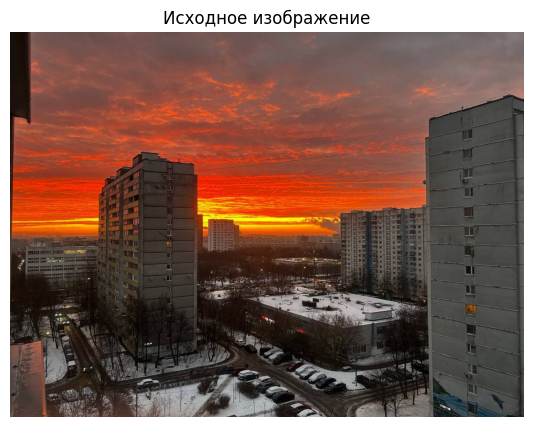

In [18]:
# 1. Загрузка и отображение изображения
image_path = "example.jpg" 
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.imshow(image)
plt.title("Исходное изображение")
plt.axis("off")
plt.show()

### Итог
Изображение успешно загружено и отображено с помощью matplotlib.

### 2. Преобразование цветовых пространств

- Преобразование цветовых пространств:
    - Преобразуйте изображение из RGB в Grayscale и HSV.
    - Отобразите каждое из полученных изображений.
    - Постройте гистограммы яркости для исходного и серого изображений.

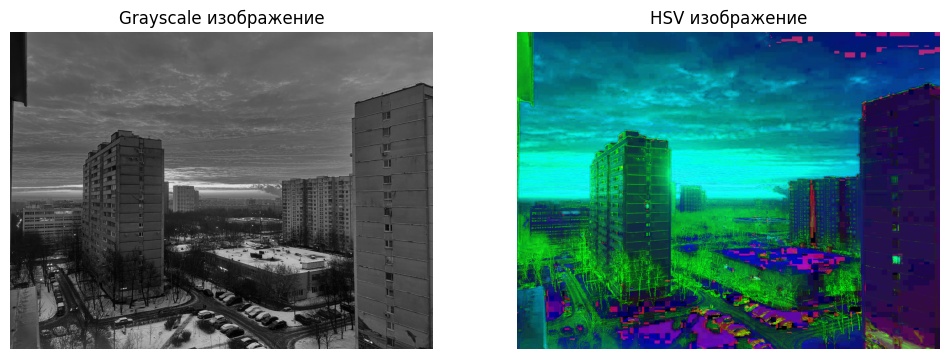

In [ ]:
# 2. Преобразование цветовых пространств
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].imshow(gray_image, cmap="gray")
ax[0].set_title("Grayscale изображение")
ax[0].axis("off")

ax[1].imshow(hsv_image)
ax[1].set_title("HSV изображение")
ax[1].axis("off")
plt.show()

### Итог
Исходное изображение преобразовано в два цветовых пространства:
1) Grayscale, используется для упрощенной обработки изображений.
2) HSV, позволяет анализировать изображение на основе цветовых характеристик (выглядит более интересно чем Grayscale и не так депрессивно).

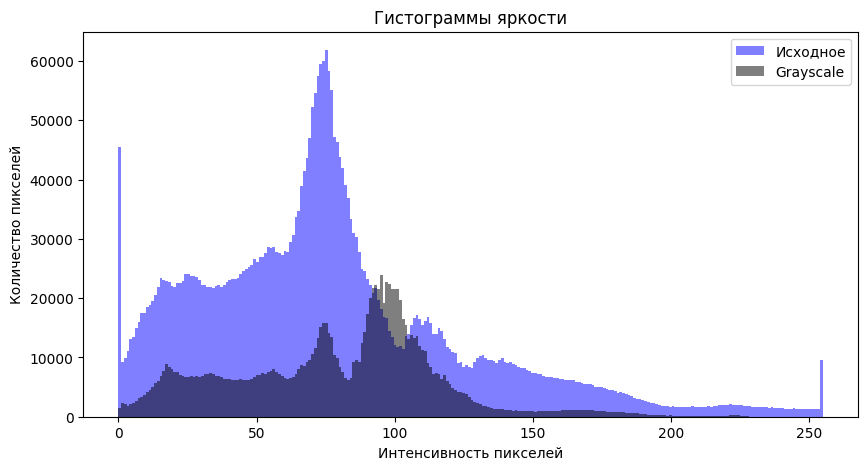

In [20]:
# 2.1 Гистограммы яркости
plt.figure(figsize=(10, 5))
plt.hist(image.ravel(), bins=256, color='b', alpha=0.5, label='Исходное')
plt.hist(gray_image.ravel(), bins=256, color='k', alpha=0.5, label='Grayscale')
plt.legend()
plt.xlabel("Интенсивность пикселей")
plt.ylabel("Количество пикселей")
plt.title("Гистограммы яркости")
plt.show()

### Итог
Построены гистограммы интенсивности пикселей для:
1) Исходного изображения
2) Grayscale-изображения
Гистограммы позволяют оценить распределение яркости и контрастность изображения.

Основной пик изображения приходится на средние значения - это значит, что изображение имеет тёмные и средние оттенки с хорошей детализацией.

### 3. Фильтрация изображений:
- Примените к серому изображению следующие фильтры:
    - Гауссово сглаживание с разными значениями σ (сигма).
    - Медианный фильтр с разными размерами ядра.
    - Фильтр Лапласа для повышения резкости.
    - Отобразите результаты фильтрации и сравните их визуально.

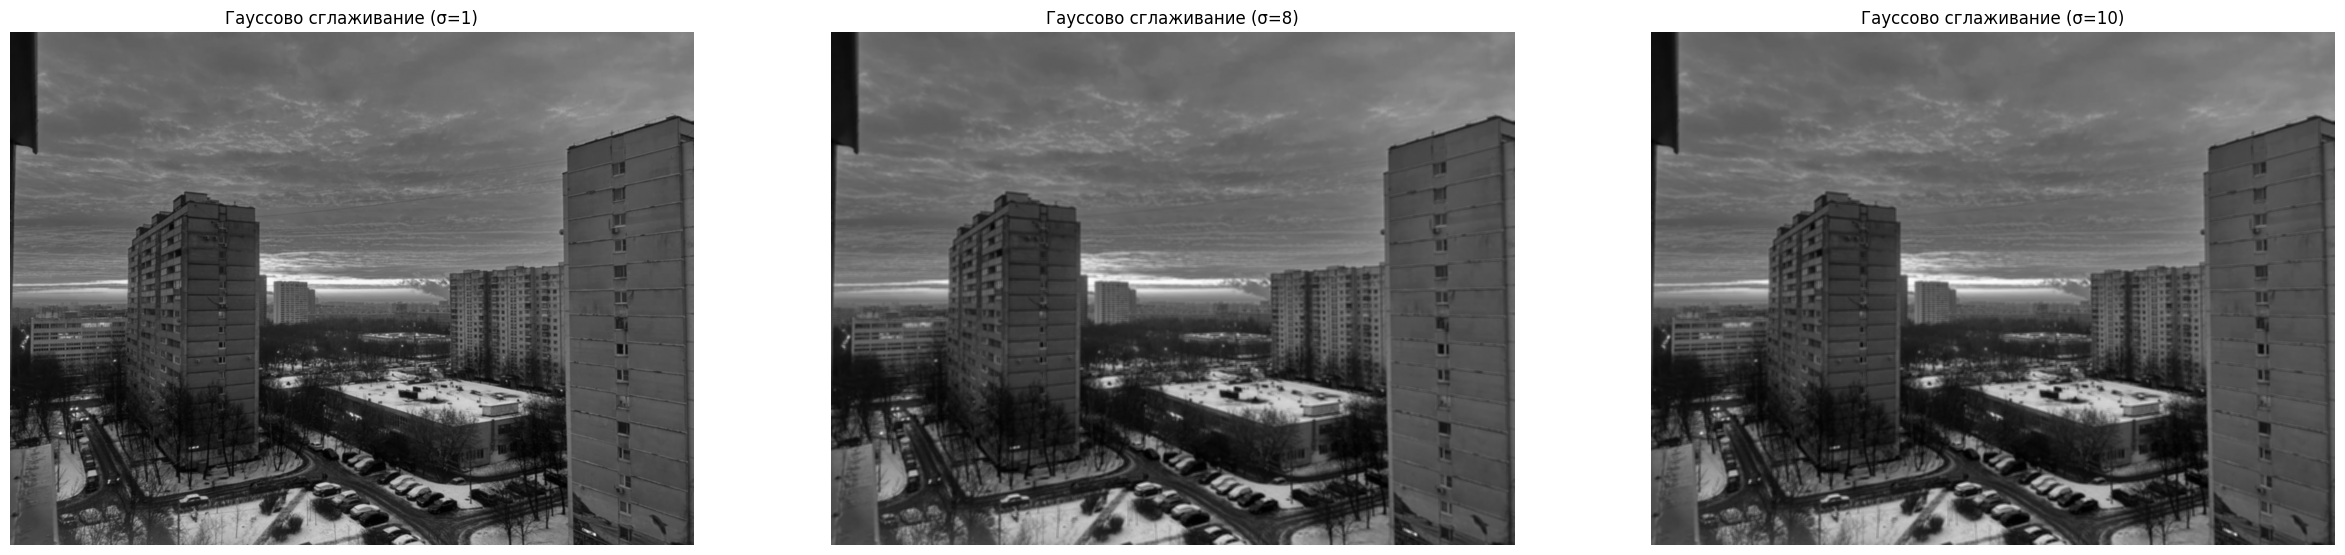

In [37]:
# 3. Фильтрация изображений
sigma_values = [1, 8, 10]
kernel_sizes = [1, 7, 9]

fig, ax = plt.subplots(1, len(sigma_values), figsize=(30, 15))
for i, sigma in enumerate(sigma_values):
    blurred = cv2.GaussianBlur(gray_image, (5, 5), sigma)
    ax[i].imshow(blurred, cmap="gray")
    ax[i].set_title(f"Гауссово сглаживание (σ={sigma})")
    ax[i].set_xlabel("Ширина")
    ax[i].set_ylabel("Высота")
    ax[i].axis("off")
plt.show()

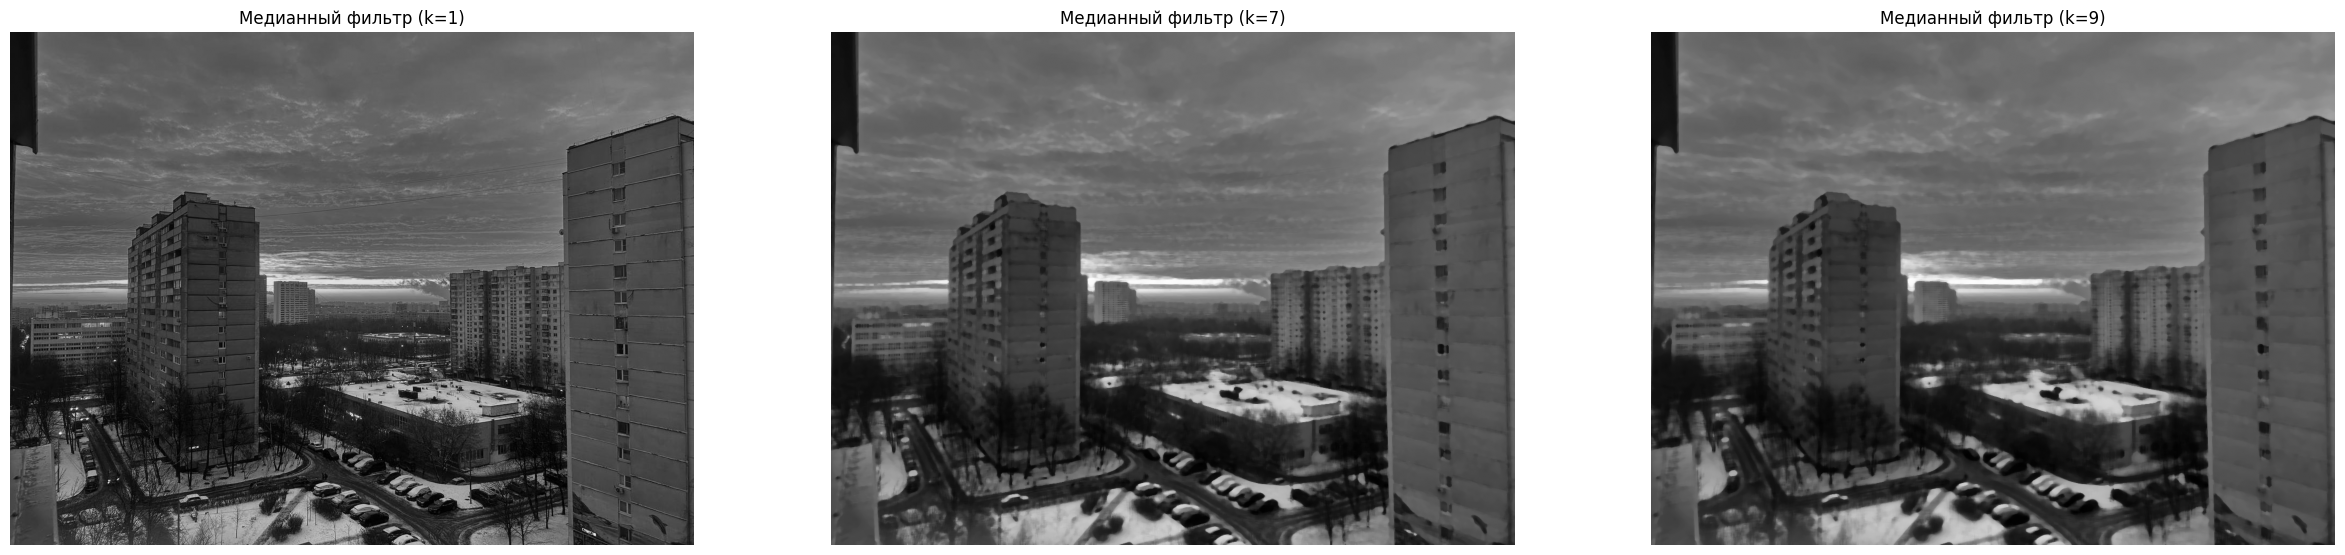

In [38]:
fig, ax = plt.subplots(1, len(kernel_sizes), figsize=(30, 15))
for i, k in enumerate(kernel_sizes):
    median_filtered = cv2.medianBlur(gray_image, k)
    ax[i].imshow(median_filtered, cmap="gray")
    ax[i].set_title(f"Медианный фильтр (k={k})")
    ax[i].set_xlabel("Ширина")
    ax[i].set_ylabel("Высота")
    ax[i].axis("off")
plt.show()

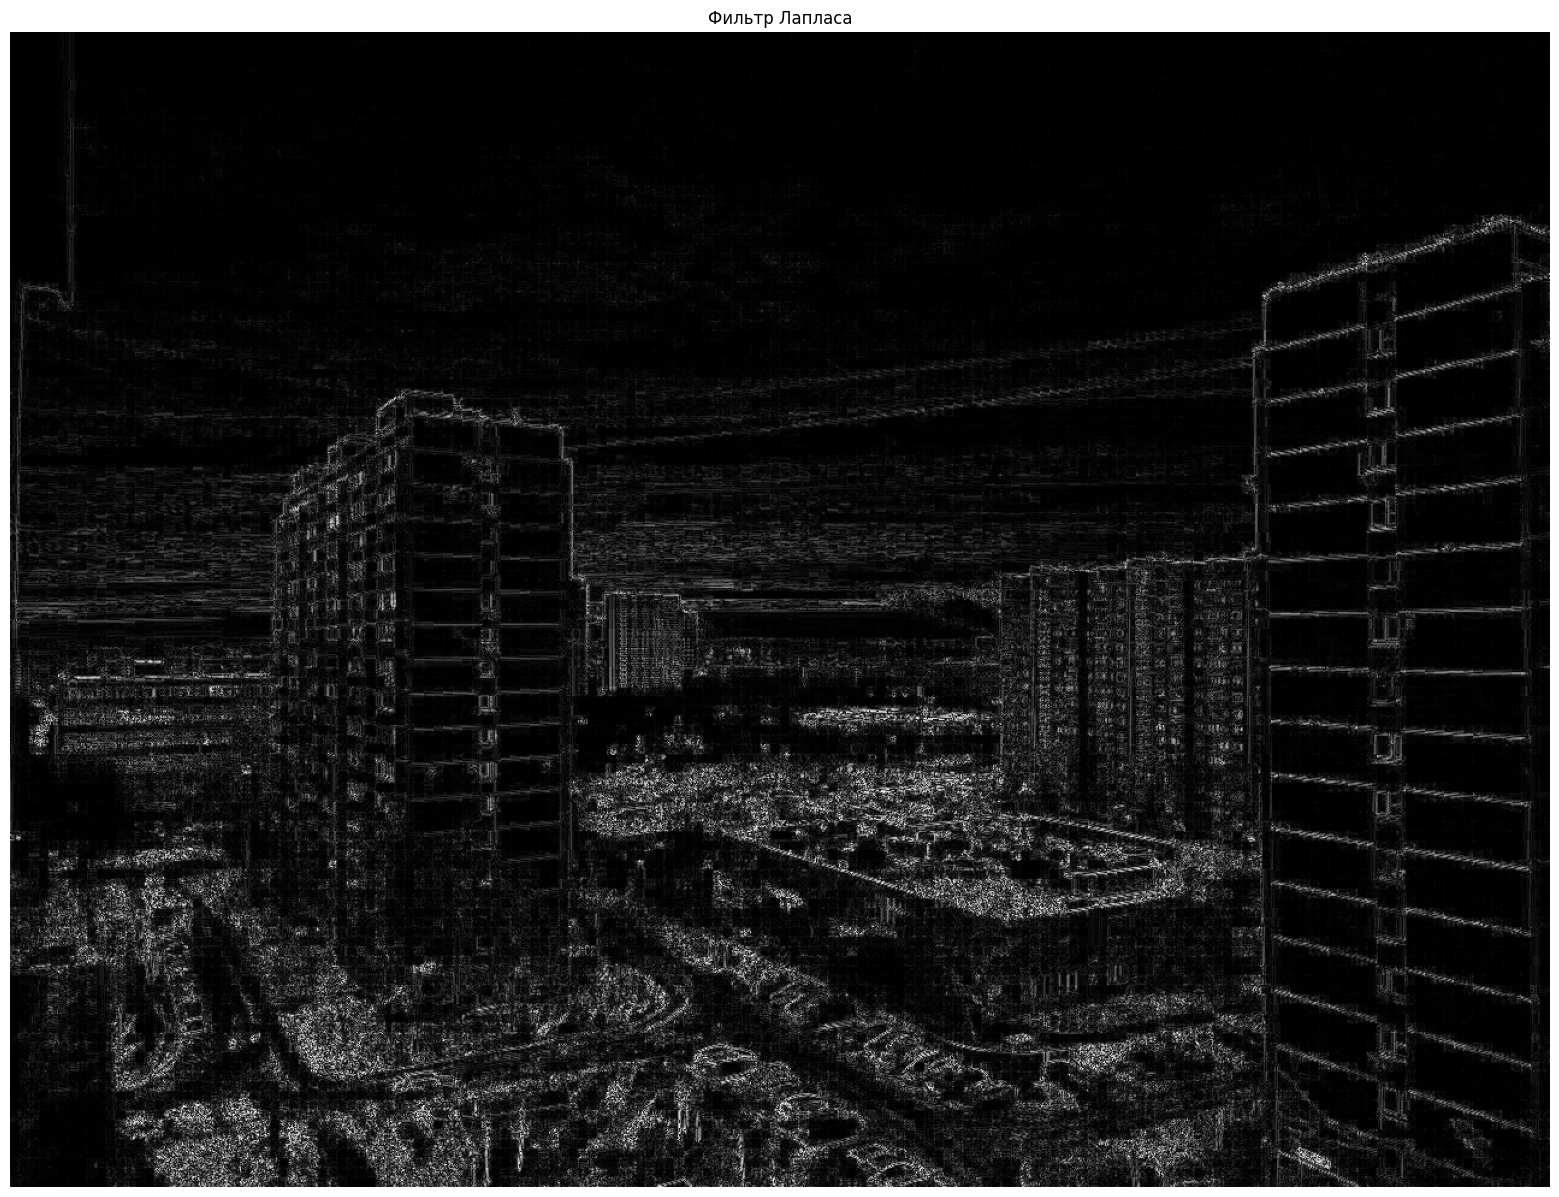

In [43]:
# Фильтр Лапласа
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
laplacian = np.uint8(np.abs(laplacian))

plt.figure(figsize=(30, 15))
plt.imshow(laplacian, cmap="gray")
plt.title("Фильтр Лапласа")
plt.xlabel("Ширина")
plt.ylabel("Высота")
plt.axis("off")
plt.show()

### Итог
Применены три вида фильтрации для сглаживания изображения и устранения шумов:
- **Гауссово размытие** с разными значениями σ (сигма): помогает сгладить шум и уменьшить резкие переходы.
- **Медианный фильтр** с разными размерами ядра: эффективно удаляет импульсные шумы, но и сильнее мылит изображение.
- **Фильтр Лапласа**: используется для повышения резкости изображения.

### 4. Выделение краев и углов
- Используйте оператор Собеля для определения горизонтальных и вертикальных градиентов.
- Примените алгоритм Кэнни для обнаружения краев.
- Используйте детектор углов Harris или Shi-Tomasi для выявления угловых точек.
- Наложите результаты на исходное изображение и отобразите.

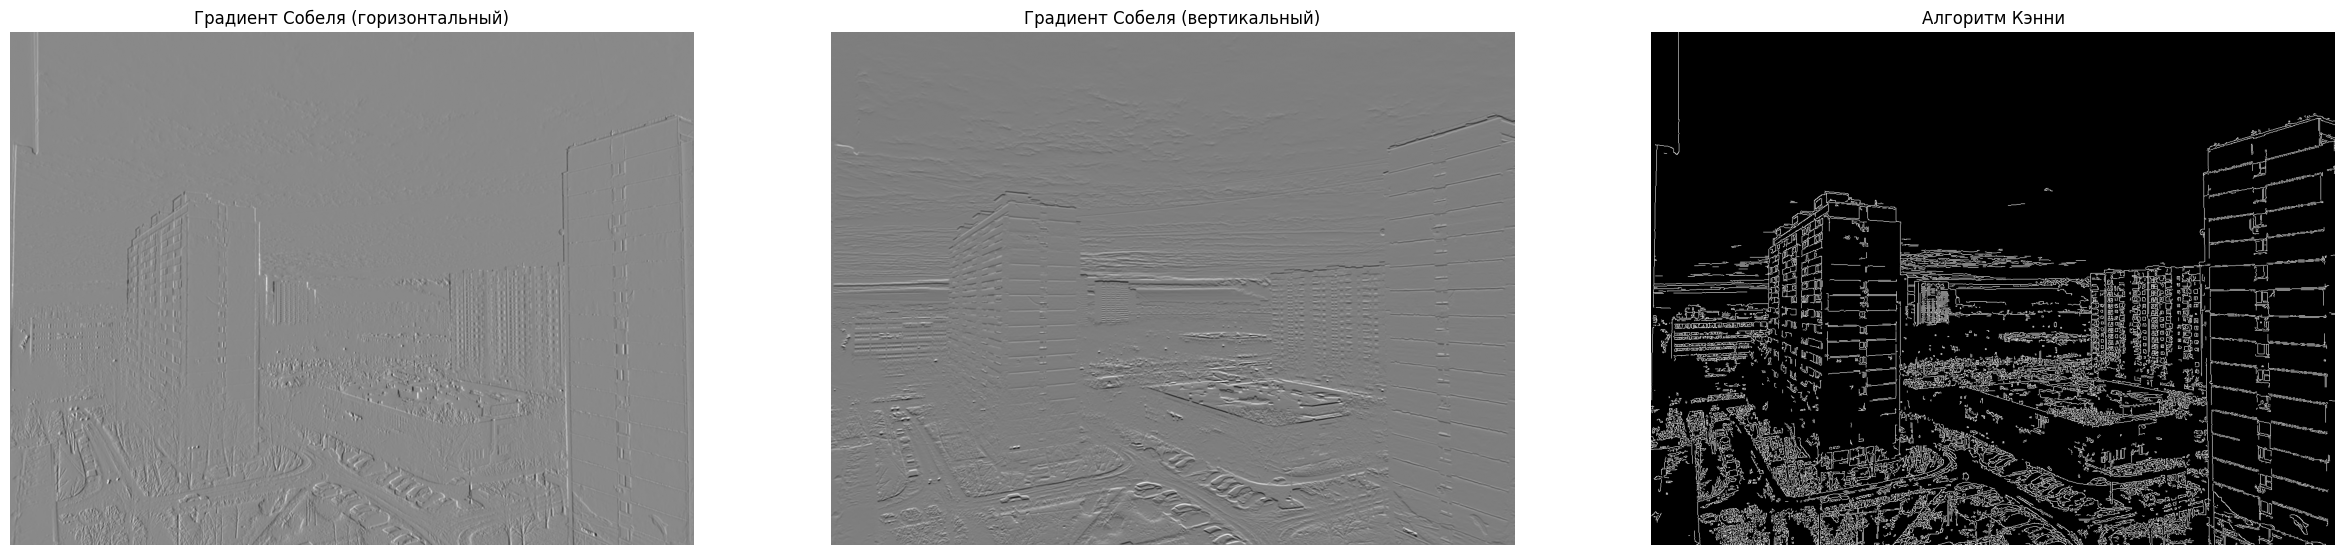

In [44]:
# 4. Выделение краев и углов
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
canny_edges = cv2.Canny(gray_image, 100, 200)

fig, ax = plt.subplots(1, 3, figsize=(30, 15))
ax[0].imshow(sobel_x, cmap="gray")
ax[0].set_title("Градиент Собеля (горизонтальный)")
ax[0].axis("off")
ax[1].imshow(sobel_y, cmap="gray")
ax[1].set_title("Градиент Собеля (вертикальный)")
ax[1].axis("off")
ax[2].imshow(canny_edges, cmap="gray")
ax[2].set_title("Алгоритм Кэнни")
ax[2].axis("off")
plt.show()

### Итоги
- Использованы методы выделения краев:
  - **Оператор Собеля**: позволяет определить горизонтальные и вертикальные градиенты изображения.
  - **Алгоритм Кэнни**: улучшенный метод обнаружения границ объектов.
- Применены методы выделения углов:
  - **Детектор Харриса**: находит точки с резкими изменениями градиента.
  - **Детектор Shi-Tomasi**: выделяет хорошо различимые углы в изображении.
- Результаты наложены на исходное изображение и отображены.

### 5. Морфологические операции:
- Бинаризуйте серое изображение с помощью пороговой сегментации.
- Примените операции эрозии и дилатации с различными структурными элементами.
- Отобразите результаты и объясните эффект каждой операции.

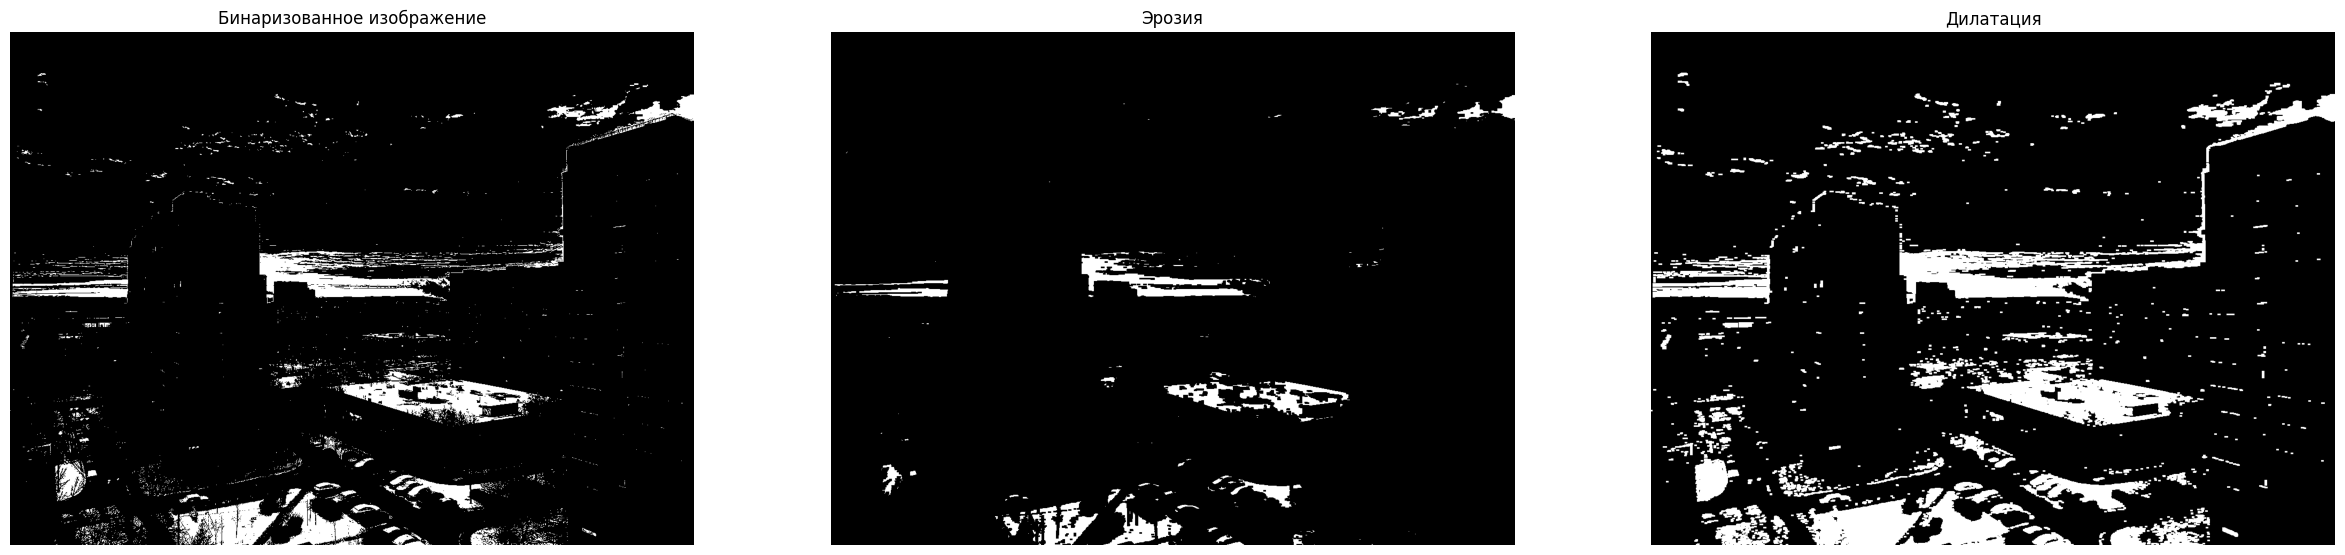

In [49]:
# 5. Морфологические операции
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
kernel = np.ones((3,5), np.uint8)
eroded = cv2.erode(binary_image, kernel, iterations=1)
dilated = cv2.dilate(binary_image, kernel, iterations=1)

fig, ax = plt.subplots(1, 3, figsize=(30, 15))
ax[0].imshow(binary_image, cmap="gray")
ax[0].set_title("Бинаризованное изображение")
ax[0].axis("off")
ax[1].imshow(eroded, cmap="gray")
ax[1].set_title("Эрозия")
ax[1].axis("off")
ax[2].imshow(dilated, cmap="gray")
ax[2].set_title("Дилатация")
ax[2].axis("off")
plt.show()

### Итоги
**Описание:**
- Исходное Grayscale-изображение подвергнуто пороговой бинаризации.
- Применены две морфологические операции:
  - **Эрозия**: уменьшает белые области, убирая мелкие шумы и уменьшая детали.
  - **Дилатация**: расширяет белые области, заполняя мелкие пробелы.
- Визуализированы результаты каждой операции, показывая их влияние на изображение.